In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy

import LGF_funcs as LGF

In [2]:
import time

c = 0.1
alpha = 0.5
n_max = 100
m_max = 100

n_samples = n_max*m_max

bessel_int_level = np.arange(500, 3004, 500)
bessel_int_level_title = np.arange(500, 3004, 500)

n_int_level = len(bessel_int_level)
bessel_mat = np.zeros((n_samples, n_int_level))
trap_vec = np.zeros(n_samples)
fft_vec = np.zeros(n_samples)
trap_true_vec = np.zeros(n_samples)

# Compute true values
eps = 1e-10
t0 = time.time()
for i in range(n_samples):
    m = int(i/n_max)
    n = i - m*n_max

    eta_n = c**2/alpha * (1 - 0.01)**2
    M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
    gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

    N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)
    trap_true_vec[i] = LGF.eval_lgf(c, alpha, n, m, N_trap*2)
    
t1 = time.time()
t_true = t1 - t0

print(t_true)

# Compute trapezoidal rule values
n_times_trap = 10
t0 = time.time()
for j in range(n_times_trap):
    for i in range(n_samples):
        m = int(i/n_max)
        n = i - m*n_max

        eta_n = c**2/alpha * (1 - 0.01)**2
        M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
        gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

        N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)
        

        trap_vec[i] = LGF.eval_lgf(c, alpha, n, m, N_trap)

t1 = time.time()
t_trap = (t1 - t0)/n_times_trap

# Compute FFT trapezoidal rule values
n_times_fft = 1000
t0 = time.time()
for j in range(n_times_fft):
    for i in range(m_max):
        m = i
        idx_begin = i*n_max

        eta_n = c**2/alpha * (1 - 0.01)**2
        M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
        gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

        N_trap = max(int(n_max),int(math.ceil(0.5/gamma_eta_n*np.log(2*M_eta_n/eps)) + n_max/2))
        
        res = LGF.eval_lgf_rfft(c, alpha, m, N_trap)
        fft_vec[idx_begin:(idx_begin+n_max)] = res[:n_max]

t1 = time.time()
t_fft = (t1 - t0)/n_times_fft


t0 = time.time()
for i in range(n_samples):
    m = int(i/n_max)
    n = i - m*n_max

    eta_n = c**2/alpha * (1 - 0.01)**2
    M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
    gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

    N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)
    

t1 = time.time()
t_non = t1 - t0

time_vec = []


for j, v in enumerate(bessel_int_level):
    print(j)
    t0 = time.time()
    for i in range(n_samples):
        m = int(i/n_max)
        n = i - m*n_max
        res = LGF.Bessel_representation4(c, n, m, alpha, v, eps, 100000)
        bessel_mat[i, j] = res
    t1 = time.time()
    dt = t1 - t0
    time_vec.append(dt)

0.2895939350128174
0
1
2
3
4
5


In [3]:
n_exp = 3
bessel_err = np.mean(np.abs(bessel_mat - trap_true_vec.reshape(-1,1)), axis=0)
bessel_err_inf = np.max(np.abs(bessel_mat - trap_true_vec.reshape(-1,1)), axis=0)
for i in range(len(bessel_int_level)):
    print(np.mean(np.abs(bessel_mat[:,i] - trap_true_vec)))
    local_err = np.abs(bessel_mat[:,i] - trap_true_vec)
    idx = np.argsort(-1*local_err)

for i in range(len(bessel_int_level)):
    mag_sol = np.sqrt(np.mean(np.abs(bessel_mat[:,i])**2))
    mag_sol_a = np.sqrt(np.mean(np.abs(trap_true_vec)**2))
    err_v = np.sqrt(np.mean((np.abs(bessel_mat[:,i] - trap_true_vec)**2)))
    max_v = np.max(np.abs(bessel_mat[:,i] - trap_true_vec))
    print(bessel_int_level[i]," ", err_v, " ", max_v, " ", mag_sol, " ", mag_sol_a)

1.723804451436628e-05
1.1161338434282008e-07
7.079411515058545e-10
4.495600687136902e-12
5.708246683439636e-14
2.670733126351932e-15
500   3.348425828756641e-05   0.00012927074827007168   0.020094914347228803   0.020110839834226683
1000   1.6482738404339812e-07   4.67904232914762e-07   0.02011077888120831   0.020110839834226683
1500   9.12850186482317e-10   2.1594726007378995e-09   0.020110839546695014   0.020110839834226683
2000   7.368916351747733e-12   5.11258542446047e-10   0.02011083983279947   0.020110839834226683
2500   2.8192561487750154e-12   2.8188816256867065e-10   0.020110839834218252   0.020110839834226683
3000   1.651737255067146e-13   1.6160123342571706e-11   0.02011083983422643   0.020110839834226683


In [4]:
print(t_non)
print(t_trap)

0.023534059524536133
0.24973340034484864


<Figure size 640x480 with 0 Axes>

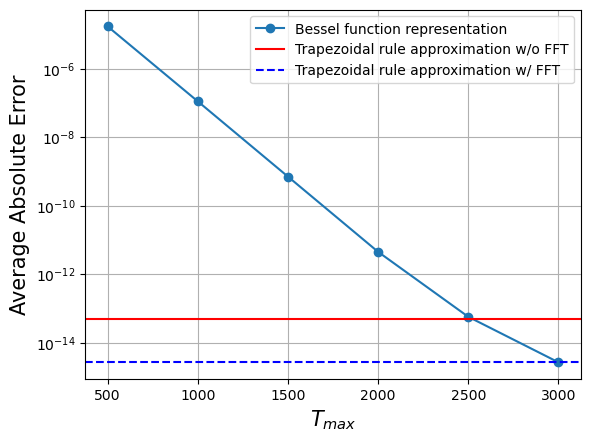

In [5]:
trap_mean = np.mean(np.abs(trap_vec - trap_true_vec))
fft_mean = np.mean(np.abs(fft_vec - trap_true_vec))
plt.clf()
plt.figure()
plt.semilogy(bessel_int_level_title, bessel_err,'-o', label="Bessel function representation")
plt.axhline(y=trap_mean, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
plt.axhline(y=fft_mean, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")
plt.xticks(bessel_int_level_title, bessel_int_level)
ax = plt.gca()

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Average Absolute Error', fontsize=15)

g = plt.grid(visible = True, which='major')

plt.minorticks_off()

plt.savefig('Bessel_01_FFT_Trap/Bessel_error_01_Avg_no_text.pdf')

<Figure size 640x480 with 0 Axes>

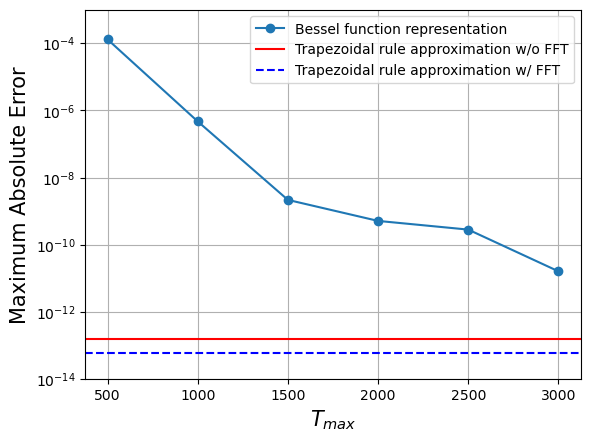

In [6]:
trap_mean = np.mean(np.abs(trap_vec - trap_true_vec))
fft_mean = np.mean(np.abs(fft_vec - trap_true_vec))
trap_inf = np.max(np.abs(trap_vec - trap_true_vec))
fft_inf = np.max(np.abs(fft_vec - trap_true_vec))
plt.clf()
plt.figure()
plt.semilogy(bessel_int_level_title, bessel_err_inf,'-o', label="Bessel function representation")
plt.axhline(y=trap_inf, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
plt.axhline(y=fft_inf, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")
plt.xticks(bessel_int_level_title, bessel_int_level)
plt.ylim([1e-14, 1e-3])
plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Maximum Absolute Error', fontsize=15)

g = plt.grid(visible = True, which='both', axis='both')

plt.minorticks_off()


plt.savefig('Bessel_01_FFT_Trap/Bessel_error_01_inf_no_text.pdf')

<Figure size 640x480 with 0 Axes>

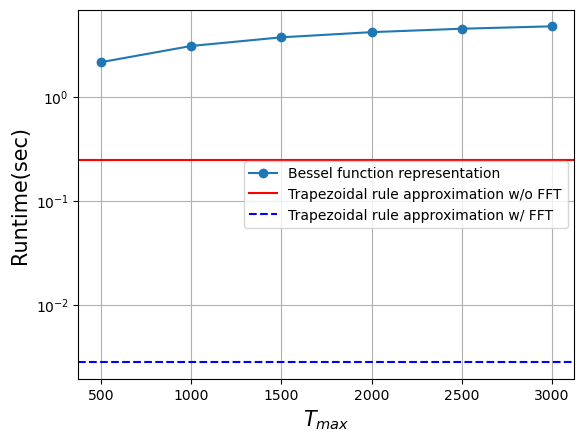

In [7]:
plt.clf()
plt.figure()
plt.semilogy(bessel_int_level_title, time_vec,'-o', label="Bessel function representation")
plt.xticks(bessel_int_level_title, bessel_int_level)

plt.axhline(y=t_trap, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
plt.axhline(y=t_fft, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Runtime(sec)', fontsize=15)

plt.grid(visible = True, which='major')

plt.minorticks_off()
plt.savefig('Bessel_01_FFT_Trap/Bessel_error_01_log_no_text.pdf')

<Figure size 640x480 with 0 Axes>

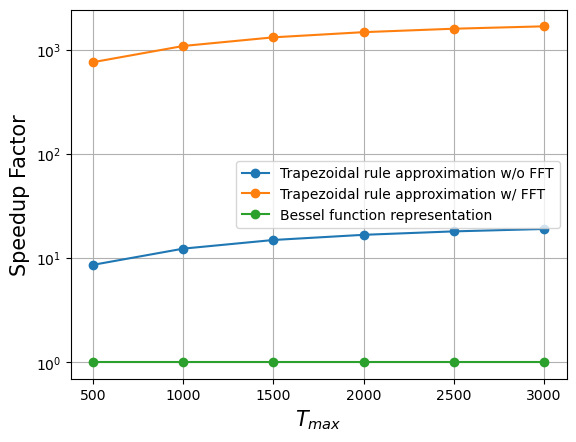

In [8]:
# Speed up
plt.clf()
plt.figure()
fft_speedup = [i/t_fft for i in time_vec]
trap_speedup = [i/t_trap for i in time_vec]
bessel_speedup = [i/i for i in time_vec]
plt.semilogy(bessel_int_level_title, trap_speedup, '-o', label="Trapezoidal rule approximation w/o FFT")
plt.semilogy(bessel_int_level_title, fft_speedup, '-o', label="Trapezoidal rule approximation w/ FFT")
plt.xticks(bessel_int_level_title, bessel_int_level)

plt.semilogy(bessel_int_level_title, bessel_speedup,'-o', label="Bessel function representation")

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Speedup Factor', fontsize=15)
plt.grid(visible = True, which='major')

plt.minorticks_off()
plt.savefig('Bessel_01_FFT_Trap/Bessel_error_01_speed_up.pdf')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

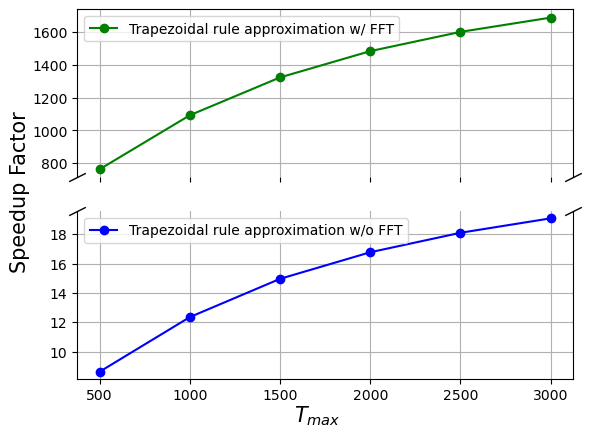

In [9]:
# Speed up using broken lines
plt.clf()
plt.figure()
fft_speedup = [i/t_fft for i in time_vec]
trap_speedup = [i/t_trap for i in time_vec]
bessel_speedup = [i/i for i in time_vec]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(bessel_int_level_title, fft_speedup, '-o',color= 'g', label="Trapezoidal rule approximation w/ FFT")
ax2.plot(bessel_int_level_title, trap_speedup, '-o',color = 'b', label="Trapezoidal rule approximation w/o FFT")

ax1.set_ylim(min(fft_speedup)-50, max(fft_speedup)+50)
ax2.set_ylim(min(trap_speedup)-0.5, max(trap_speedup)+0.5)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

ax1.tick_params(labeltop=False, top=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.grid(visible = True, which='major')
ax2.grid(visible = True, which='major')

ax1.legend()
ax2.legend()

fig.supxlabel(r'$T_{max}$', fontsize=15)
fig.supylabel(r'Speedup Factor', fontsize=15)

plt.grid(visible = True, which='major')

plt.minorticks_off()
plt.savefig('Bessel_01_FFT_Trap/Bessel_error_01_speed_up_broken_line_no_bessel.pdf')